<a href="https://colab.research.google.com/github/RYU-MCFLY/Algebra_lineal-para-ML/blob/main/Copia_de_Clasificador_de_Textos_con_Regresi%C3%B3n_log%C3%ADstica_usando_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
datos =datos=pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana8/spam_ham_dataset.csv',
                  usecols=['text','label_num'] )
datos.columns=['text','spam']

print(datos.shape)
datos.head()

(5171, 2)


,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
datos['spam'].value_counts()

0    3672
1    1499
Name: spam, dtype: int64

## Preprocesamiento de textos

In [ ]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = (texto).lower()

  #elimina stopwords + 'subject'
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')+(['subject'])) + r')\b\s*')
  texto = stop.sub('', texto) 

  #quita puntuaciones y números
  texto = re.sub('[^a-z]+', ' ', texto)

  #lematizar y quedarnos con palabras que tengan más de tres caracteres
  st = PorterStemmer()
  texto = texto.split()
  texto = ' '.join([st.stem(i) for i in texto])
  
  return(texto)

In [ ]:
datos['text_pp'] = datos['text'].apply(preprocesar)
datos

,text,spam,text_pp
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom januari see attach file hplnol xl hpln...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonder time year ...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend abas d...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenu unders...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,put ft transport volum decreas contract thank ...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,follow nom hpl take extra mmcf weekend tri nex...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpin daili ga nomin juli mention earlier hop...
5169,Subject: industrial worksheets for august 2000...,0,industri worksheet august activ attach workshe...


# Vectorización de Texto mediante BOW

In [ ]:
tfidf = TfidfVectorizer(min_df=3)
mdt_tfidf = tfidf.fit_transform(datos['text_pp']) 
palabras = tfidf.get_feature_names()
MDT = pd.DataFrame(mdt_tfidf.todense(), 
                              index=datos.index, 
                              columns=palabras)
print(MDT.shape)
MDT

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5171, 10376)


,aa,aalland,aaron,ab,aba,aback,abacu,abacustech,abandon,abash,...,zodiac,zoloft,zone,zonedubai,zonewww,zs,zu,zurich,zwallet,zyban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dividir conjunto de entrenamiento y prueba

In [ ]:
X = mdt_tfidf.todense()
y = datos['spam']


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2,  
                                                     random_state=3)

In [ ]:
#Conjunto de entrenamiento
X_train.shape, y_train.shape

((4136, 10376), (4136,))

In [ ]:
#Conjunto de prueba
X_test.shape, y_test.shape

((1035, 10376), (1035,))

# Diseño del modelo de red neuronal usando TensorFlow

In [ ]:
import tensorflow as tf  
print(tf.__version__)

2.9.2


In [ ]:
tf.random.set_seed(8)



TensorFlow y Keras, ambos proyectos para el aprendizaje profundo,tienen una historia entrelazada. Keras era un conjunto de abstracciones que facilita el aprendizaje profundo, pero necesitada de un backend, desde la versión de Keras v1.1.0 TensorFlow fue el backend predeterminado (antes era Theano).

A partir del lanzamiento de TensorFlow a mediados de 2019, Keras es ahora la API de alto nivel de TensorFlow para facilitar el diseño y entrenamiento de modelos rápidos y fáciles.  

[Video sobre TensorFlow 2.0](https://www.youtube.com/watch?v=EqWsPO8DVXk)

In [ ]:
model = tf.keras.Sequential([                     # https://www.tensorflow.org/guide/keras/sequential_model
                             
        tf.keras.Input(shape=(X.shape[1],)),              # El número de neuronas en la capa de entrada es igual al número de características o dimensiones en los datos. 
    
        tf.keras.layers.Dense(                       
                              1,                     # dimensiones de salida aqui es 1 sola neurona
                              activation='sigmoid',  # función de activación  https://www.tensorflow.org/api_docs/python/tf/keras/activations
                              name="layer_1"         # nombre de la capa

                              )                       #la salida es de 10376 + 1 = 10377
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


### Alternativas para inicializar una red Secuencial

Una alternativa para establecer las dimensiones de entrada en la primera capa es utilizar el parámetro `input_shape`

In [ ]:
model = tf.keras.Sequential([
    
          tf.keras.layers.Dense(1, 
                                input_shape = (X.shape[1],),      # dimensiones de la entrada  
                                activation='sigmoid',             # para la regresión logística
                                name="layer_1"                    # nombre de la capa
                                ),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


Otra manera de construir un modelo secuencial es declararlo y a continuación añadir capas utilizando el método `add`

In [ ]:
model = tf.keras.Sequential()
    
model.add(tf.keras.Input(shape=(X.shape[1],)))

model.add(tf.keras.layers.Dense(1,
                                  activation='sigmoid',        # para la regresión logística
                                  name="layer_1"   
                                 ))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


Que es lo mismo a:

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1,
                                  input_shape = (X.shape[1],),   
                                  activation='sigmoid',        # para la regresión logística
                                  name="layer_1"   
                                 ))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


### Añadir y borrar capas, consultar número de capas de la red y  visualizar modelo,

In [ ]:
model.add(tf.keras.layers.Dense(1,      # con 1 neurona
                                  activation='sigmoid',       
                                  name="layer_2")  
                                  )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
 layer_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 10,379
Trainable params: 10,379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(model.layers)  # layers es un atributo del modelo que regresa una lista con las capas del modelo

2

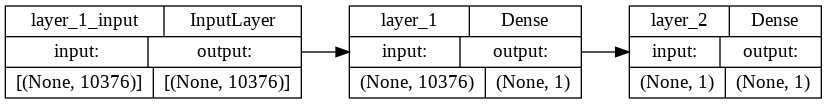

In [ ]:
tf.keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

Para borrar la última capa

In [ ]:

model.pop()    # borra la última capa
print(len(model.layers))
model.summary()


1
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


##<h2>Entrenamiento y validación

Despues de construir la red neuronal se debe configurar el proceso de entrenamiento utilizando el metodo `compile()`


In [ ]:
model.compile(optimizer='adam',             # el optimizador sirve para encontrar los pesos que minimizan la función de pérdida  -para encontrar valores omega
                                            # adam: stochastic gradient descent adaptativo
                                            # https://keras.io/api/optimizers/adam/
              
              loss='binary_crossentropy',   # función que evalua que tan bien el algoritmo modela el conjunto de datos - omegas por epoca
                                            # https://keras.io/api/losses/
              
              metrics=['accuracy']
              )


Para entrenar el módelo utilizamos el método `fit()` 

el parámetro epoch se puede usar para buscar minimizar el error, aunque también podemos caer en sobreajuste

In [ ]:
model.fit( X_train, y_train,
          epochs=10,         # número de iteraciones sobre los datos (epocas)  de 32 en 32
          )

Epoch 1/10
130/130 [==============================] - 1s 4ms/step - loss: 0.2369 - accuracy: 0.9688
Epoch 2/10
130/130 [==============================] - 0s 4ms/step - loss: 0.2223 - accuracy: 0.9727
Epoch 3/10
130/130 [==============================] - 0s 4ms/step - loss: 0.2092 - accuracy: 0.9780
Epoch 4/10
130/130 [==============================] - 1s 4ms/step - loss: 0.1973 - accuracy: 0.9794
Epoch 5/10
130/130 [==============================] - 0s 4ms/step - loss: 0.1866 - accuracy: 0.9807
Epoch 6/10
130/130 [==============================] - 0s 3ms/step - loss: 0.1767 - accuracy: 0.9819
Epoch 7/10
130/130 [==============================] - 1s 4ms/step - loss: 0.1678 - accuracy: 0.9833
Epoch 8/10
130/130 [==============================] - 0s 4ms/step - loss: 0.1595 - accuracy: 0.9838
Epoch 9/10
130/130 [==============================] - 0s 3ms/step - loss: 0.1519 - accuracy: 0.9845
Epoch 10/10
130/130 [==============================] - 1s 4ms/step - loss: 0.1448 - accuracy: 0.9848

El 130/130 que vemos es el resultado redondeado hacia arriba, de dividir el número de registros en el conjunto de entrenamiento entre 32, que es el parámetro por defaul para batch_size

In [ ]:
# batch_size
X_train.shape[0]/32

129.25

# Red neuronal de clasificación con más de una capa

In [ ]:
model = tf.keras.Sequential()
    
model.add((tf.keras.layers.InputLayer(input_shape=(X.shape[1],))))

model.add(tf.keras.layers.Dense((2/3 * X.shape[1]  + 1 ), activation='relu',name="hidden_layer_1" ))  #ya noe s sigmoidal ahora es relu

model.add(tf.keras.layers.Dense(1,activation='sigmoid', name="output_layer" ))



model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 6918)              71788086  
                                                                 
 output_layer (Dense)        (None, 1)                 6919      
                                                                 
Total params: 71,795,005
Trainable params: 71,795,005
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(10377*6918) #Parámetros para la primera capa .. 10376 + 1 * output shape
print(71788086+6918) #Sumamos los sesgos
print('Numero de parámetros:', model.count_params() ) #Solo se le suma el último sesgo

71788086
71795004
Numero de parámetros: 71795005


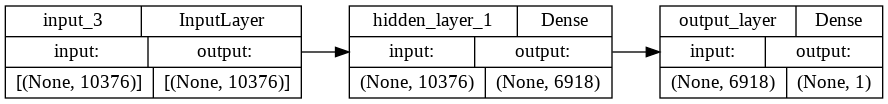

In [ ]:
tf.keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

In [ ]:
model.compile(optimizer='adam',             # stochastic gradient descent adaptativo
                                            # https://keras.io/api/optimizers/adam/
              
              loss='binary_crossentropy',   # función objetivo  que se busca minimizar
                                            # https://keras.io/api/losses/
              
              metrics=['accuracy']    # si el accuracy es =1 entonces esta ok
              )
model.fit(X_train, y_train,
          epochs=5, 
          )

Epoch 1/5
130/130 [==============================] - 4s 24ms/step - loss: 0.1256 - accuracy: 0.9420
Epoch 2/5
130/130 [==============================] - 3s 19ms/step - loss: 0.0072 - accuracy: 0.9983
Epoch 3/5
130/130 [==============================] - 3s 19ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 4/5
130/130 [==============================] - 3s 19ms/step - loss: 5.1177e-04 - accuracy: 1.0000
Epoch 5/5
130/130 [==============================] - 3s 19ms/step - loss: 3.0727e-04 - accuracy: 1.0000


In [ ]:
model.predict(X_test)

33/33 [==============================] - 0s 4ms/step


array([[9.6917200e-01],
       [9.9948514e-01],
       [8.5846681e-09],
       ...,
       [3.2461643e-01],
       [9.9989855e-01],
       [1.7750867e-10]], dtype=float32)

In [ ]:
y_test    #para ver que correos son spam

4020    1
3561    1
3434    0
111     0
1126    0
       ..
2078    1
334     1
4746    0
2850    1
2180    0
Name: spam, Length: 1035, dtype: int64

In [ ]:
#Obtenemos el MSE  -error cuadratico medio, si el valor es bajo, esta bien aproximado
mean_squared_error(model.predict(X_test),y_test)

33/33 [==============================] - 0s 4ms/step


0.012779785783352003

# Referencia:

1. Keras vs. tf.keras: What’s the difference in TensorFlow 2.0? [Internet]. PyImageSearch. 2019 [citado 20 de julio de 2021]. Disponible en: https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

1. Krishnan S. How to determine the number of layers and neurons in the hidden layer? [Internet]. Geek Culture. 2021 [citado 25 de abril de 2022]. Disponible en: https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3

